# Method 2: ML (live) finger counting

The goal of the project was to implement touchless human-computer interaction via hand gestures. Users should be able to control the actions of a computer by the number of fingers held up.

Possible applications include public interactive information boards (avoiding physical contacts to reduce the risk of infections) or interactions with augmented reality glasses.

**Notice. The implementation of this project is purely experimental and not intended for real-world use.**

Associated Resources:
 - Old: [Kaggle Dataset: fingers](https://www.kaggle.com/koryakinp/fingers)
 - New: [Kaggle Dataset: fingers-binary-thresh](https://www.kaggle.com/devmarcstorm/fingers-binary-thresh)

![White hand on black background](docs/output/live.png)

In [2]:
import glob
import os

import cv2  # pip install opencv-python
import matplotlib.pyplot as plt  # pip install matplotlib
import numpy as np
import tensorflow as tf  # pip install tensorflow
from tensorflow.keras import layers, models, optimizers

import webbrowser

## Train, evaluate and save model

The model was implemented with [keras](https://keras.io/) and [tensorflow](https://www.tensorflow.org/).

In [3]:
model = models.Sequential(
    [
        layers.Conv2D(16, (3, 3), input_shape=(50, 50, 1), activation=tf.nn.relu),
        layers.MaxPool2D(),
        layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(1024, activation=tf.nn.relu),
        layers.Dropout(0.1),
        layers.Dense(1024, activation=tf.nn.relu),
        layers.Dropout(0.3),
        layers.Dense(7, activation=tf.nn.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=optimizers.RMSprop(),
    loss="sparse_categorical_crossentropy",
    metrics=["acc"],
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3965952   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

2021-07-26 22:41:40.083868: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
train_images = glob.glob("data/fingers-binary-thresh/train/*/*.jpg")
Y_train = []  # label numbers of fingers
for filename in train_images:
    classification_by_finger_count = int(filename[-6])
    Y_train.append(classification_by_finger_count)

X_train = []
for filename in train_images:
    img = cv2.imread(filename, 0)

    img = cv2.resize(img, (50, 50))
    img = img / 255.0

    X_train.append(img.reshape(50, 50, 1))


X_train = np.array(X_train).reshape(len(X_train), 50, 50, 1)
Y_train = np.array(Y_train).reshape(len(Y_train), 1)

history = model.fit(X_train, Y_train, epochs=5)

2021-07-26 22:41:49.878547: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
662/662 [==============================] - 47s 71ms/step - loss: 0.2038 - acc: 0.9275
Epoch 2/5
662/662 [==============================] - 45s 68ms/step - loss: 0.0330 - acc: 0.9901
Epoch 3/5
662/662 [==============================] - 45s 68ms/step - loss: 0.0149 - acc: 0.9953
Epoch 4/5
662/662 [==============================] - 45s 68ms/step - loss: 0.0135 - acc: 0.9961
Epoch 5/5
662/662 [==============================] - 45s 69ms/step - loss: 0.0090 - acc: 0.9983


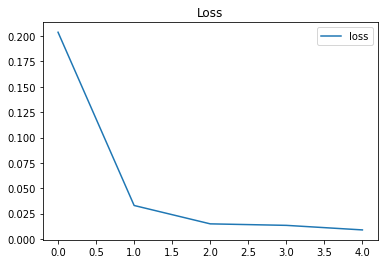

In [5]:
plt.plot(history.history["loss"], label="loss")
plt.legend()
plt.title("Loss")
plt.savefig("docs/output/loss.png")
plt.show()

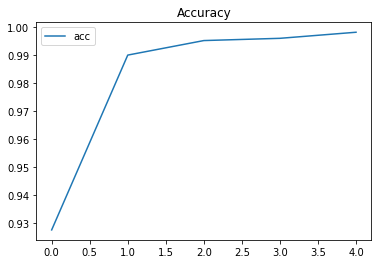

In [6]:
plt.clf()

plt.plot(history.history["acc"], label="acc")
plt.legend()
plt.title("Accuracy")
plt.savefig("docs/output/accuracy.png")
plt.show()

In [7]:
test_images = glob.glob("data/fingers-binary-thresh/test/*/*.jpg")
y_test = []
for filename in test_images:
    classification_by_finger_count = int(filename[-6])
    y_test.append(classification_by_finger_count)

        
x_test = []
for filename in test_images:
    img = cv2.imread(filename, 0)
    
    img = cv2.resize(img, (50, 50))
    img = img / 255.0
    x_test.append(img.reshape(50, 50, 1))

x_test = np.array(x_test).reshape(len(x_test), 50, 50, 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [8]:
model.evaluate(x_test, y_test)

132/132 [==============================] - 1s 9ms/step - loss: 1.1885 - acc: 0.8902


[1.1885075569152832, 0.8902381062507629]

In [9]:
img = cv2.imread(
    "data/fingers-binary-thresh/test/3/1e64ae02-6304-448c-a9a5-7602b8463ca6_3R.jpg",
    cv2.IMREAD_GRAYSCALE,
)
img = cv2.resize(img, (50, 50))
img = img / 255.0

op = np.argmax(model.predict(img.reshape(1, 50, 50, 1)))
print(f"Demo prediction: {str(op)}")

Demo prediction: 3


In [10]:
model.save("model_fingers-binary-thresh_counting.h5")

# Predict live

## Define Commands (websites to open)

In [ ]:
def command(command_number, last):
    if command_number == 6:
        return last
    if command_number == 5:
        new_website = 'https://www.beuth-hochschule.de/3049'
    elif command_number == 4:
        new_website = 'https://www.beuth-hochschule.de/lehrende'
    elif command_number == 3:
        new_website = 'https://www.beuth-hochschule.de/mitarbeitende'
    elif command_number == 2:
        new_website = 'https://www.beuth-hochschule.de/studieninteressierte'
    elif command_number == 1:
        new_website = 'https://www.beuth-hochschule.de/studierende'
    elif command_number == 0:
        new_website = 'https://www.beuth-hochschule.de/3050'

    if last != new_website:
        webbrowser.open(new_website, new=0)
        last = new_website

    return last

## Load Model from file

In [ ]:
m = tf.keras.models.load_model("model_fingers-binary-thresh_counting.h5")

The implementation of the ML approach worked better with the live camera in the end. The data set from Kaggle provided grayscale images. With the used model, the provided test images could be predicted reliably. 

However, the live images were hardly predicted correctly. The solution to the problem was inspired by another [dataset](https://www.kaggle.com/roshea6/finger-digits-05). Here the background was black, and the hand in the image was white.

With cv2.threshold() I applied this effect to the training data, as well as the live image. However, the training data was not controlled after that. So errors are possible.

```python
 _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
```

## Run live view

In [ ]:
# top, bottom, left (flipped), right (flipped)
REGION_OF_INTEREST_COORDINATES = (10, 600, 600, 10)

# CAPTURE = cv2.VideoCapture(3)
CAPTURE = cv2.VideoCapture(0)

current_guess = 0
last = ""

frame_index = 0
while True:
    _, frame = CAPTURE.read()
    frame = cv2.flip(frame, 1)

    region_of_interest = frame[
        REGION_OF_INTEREST_COORDINATES[0] : REGION_OF_INTEREST_COORDINATES[1],
        REGION_OF_INTEREST_COORDINATES[3] : REGION_OF_INTEREST_COORDINATES[2],
    ]
    region_of_interest = cv2.cvtColor(region_of_interest, cv2.COLOR_BGR2GRAY)
    region_of_interest = cv2.GaussianBlur(region_of_interest, (7, 7), 0)

    # black background, white hand
    _, region_of_interest = cv2.threshold(
        region_of_interest, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    cv2.imshow("FINGER DETECTION", region_of_interest)

    hand = cv2.resize(region_of_interest, (50, 50))

    hand = hand / 255.0

    white_pixel_count = np.sum(hand != 0)
    black_pixel_count = np.sum(hand == 0)

    if black_pixel_count > 170:
        op = np.argmax(m.predict(hand.reshape(1, 50, 50, 1)))
        print(
            f"Fingers: {str(op)}\n\t0: {black_pixel_count}\n\t255: {white_pixel_count}\n\tframe_index: {frame_index}"
        )

        if op == current_guess:
            frame_index += 1
        else:
            frame_index = 0

        if frame_index == 10:
            print("COMMAND")
            last = command(op, last)

        current_guess = op

    # Press q to exit the application
    ch = cv2.waitKey(1) & 0xFF
    if ch == ord("q"):
        break
    elif ch == ord("s"):
        cv2.imwrite("docs/output/live.png", region_of_interest)


CAPTURE.release()
cv2.destroyAllWindows()

![Demo Gif](docs/demo.gif)